In [8]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [9]:
from config.config import RAW_DATA_DIR
train_file = RAW_DATA_DIR / "train.csv"

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(train_file)

DataFrame Head

In [12]:
df.head(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence


DataFrame Columns

In [13]:
list(df.columns)

['id',
 'Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

Check For NaNs

In [14]:
nan_series = df.isna().sum()

nan_cols = list(nan_series[nan_series > 0])

print(f"The columns with NaNs are: {nan_cols}") if nan_cols else print("No columns with NaN")

No columns with NaN


Check For Nulls

In [15]:
null_series = df.isnull().sum()

null_cols = list(null_series[null_series != 0])

print(f"The columns with null values are {null_cols}") if null_cols else print("No columns with Null values")

No columns with Null values


Value Counts

In [16]:
feature_ignore = ['Age', 'BP', 'Cholesterol', 'Max HR']
for col in df.columns:
    if col in feature_ignore:
        continue
    print(df[col].value_counts())

id
0         1
1         1
2         1
3         1
4         1
         ..
629995    1
629996    1
629997    1
629998    1
629999    1
Name: count, Length: 630000, dtype: int64
Sex
1    450283
0    179717
Name: count, dtype: int64
Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64
FBS over 120
0    579608
1     50392
Name: count, dtype: int64
EKG results
0    320116
2    308562
1      1322
Name: count, dtype: int64
Exercise angina
0    457553
1    172447
Name: count, dtype: int64
ST depression
0.00    314939
1.20     29269
1.00     28647
1.60     28395
1.40     27146
         ...  
4.70         4
5.10         2
2.12         1
5.90         1
0.06         1
Name: count, Length: 66, dtype: int64
Slope of ST
1    358293
2    256215
3     15492
Name: count, dtype: int64
Number of vessels fluro
0    445862
1    106978
2     54303
3     22857
Name: count, dtype: int64
Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64
Heart Disease
Ab

Data Types of DataFrame Columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

Converting Data Types

In [18]:
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Thallium', 'Number of vessels fluro', 'Slope of ST', 'Heart Disease']
numerical_columns = []
for col in df.columns:
    if col not in categorical_columns:
        numerical_columns.append(col)

categorical_df = pd.DataFrame(df[categorical_columns])
numerical_df = pd.DataFrame(df[numerical_columns])

numerical_df.columns

Index(['id', 'Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], dtype='object')

Float and Int Separation

In [19]:
float_col = ['ST depression']
int_col = [col for col in numerical_columns if col not in float_col] 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Box Plot of Numerical Features

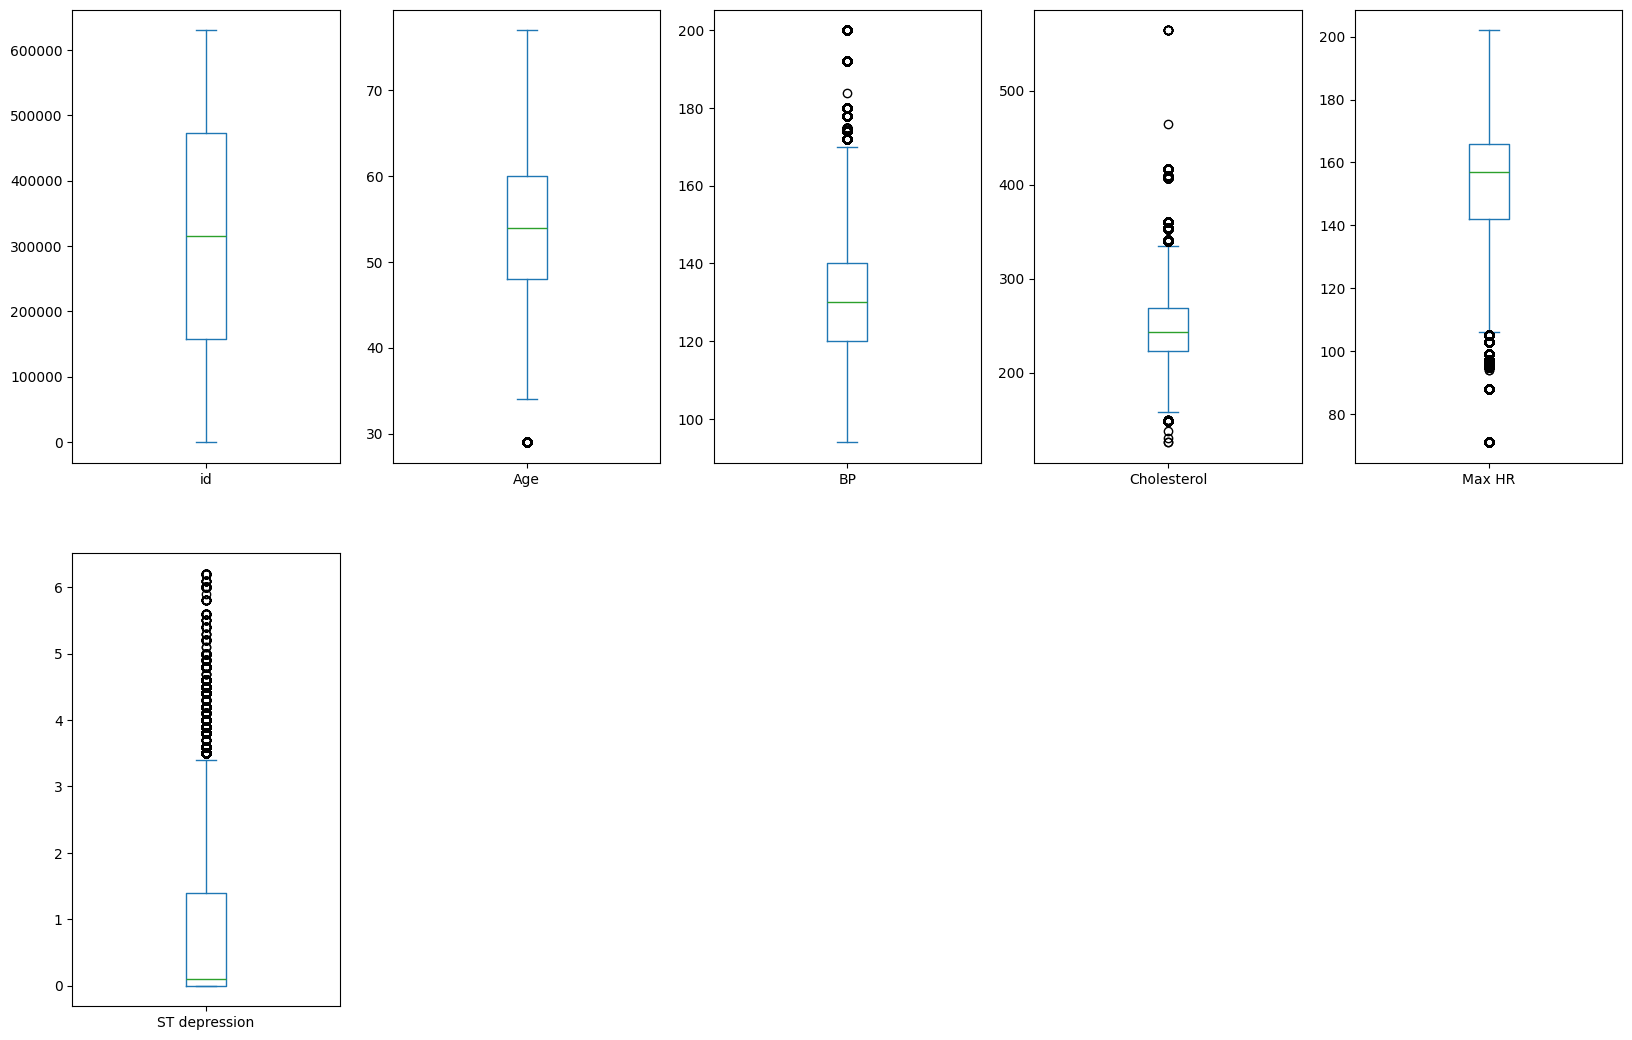

In [21]:
numerical_df.plot(kind='box', subplots=True, layout=(3,5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

Hist Plot of Numerical Features

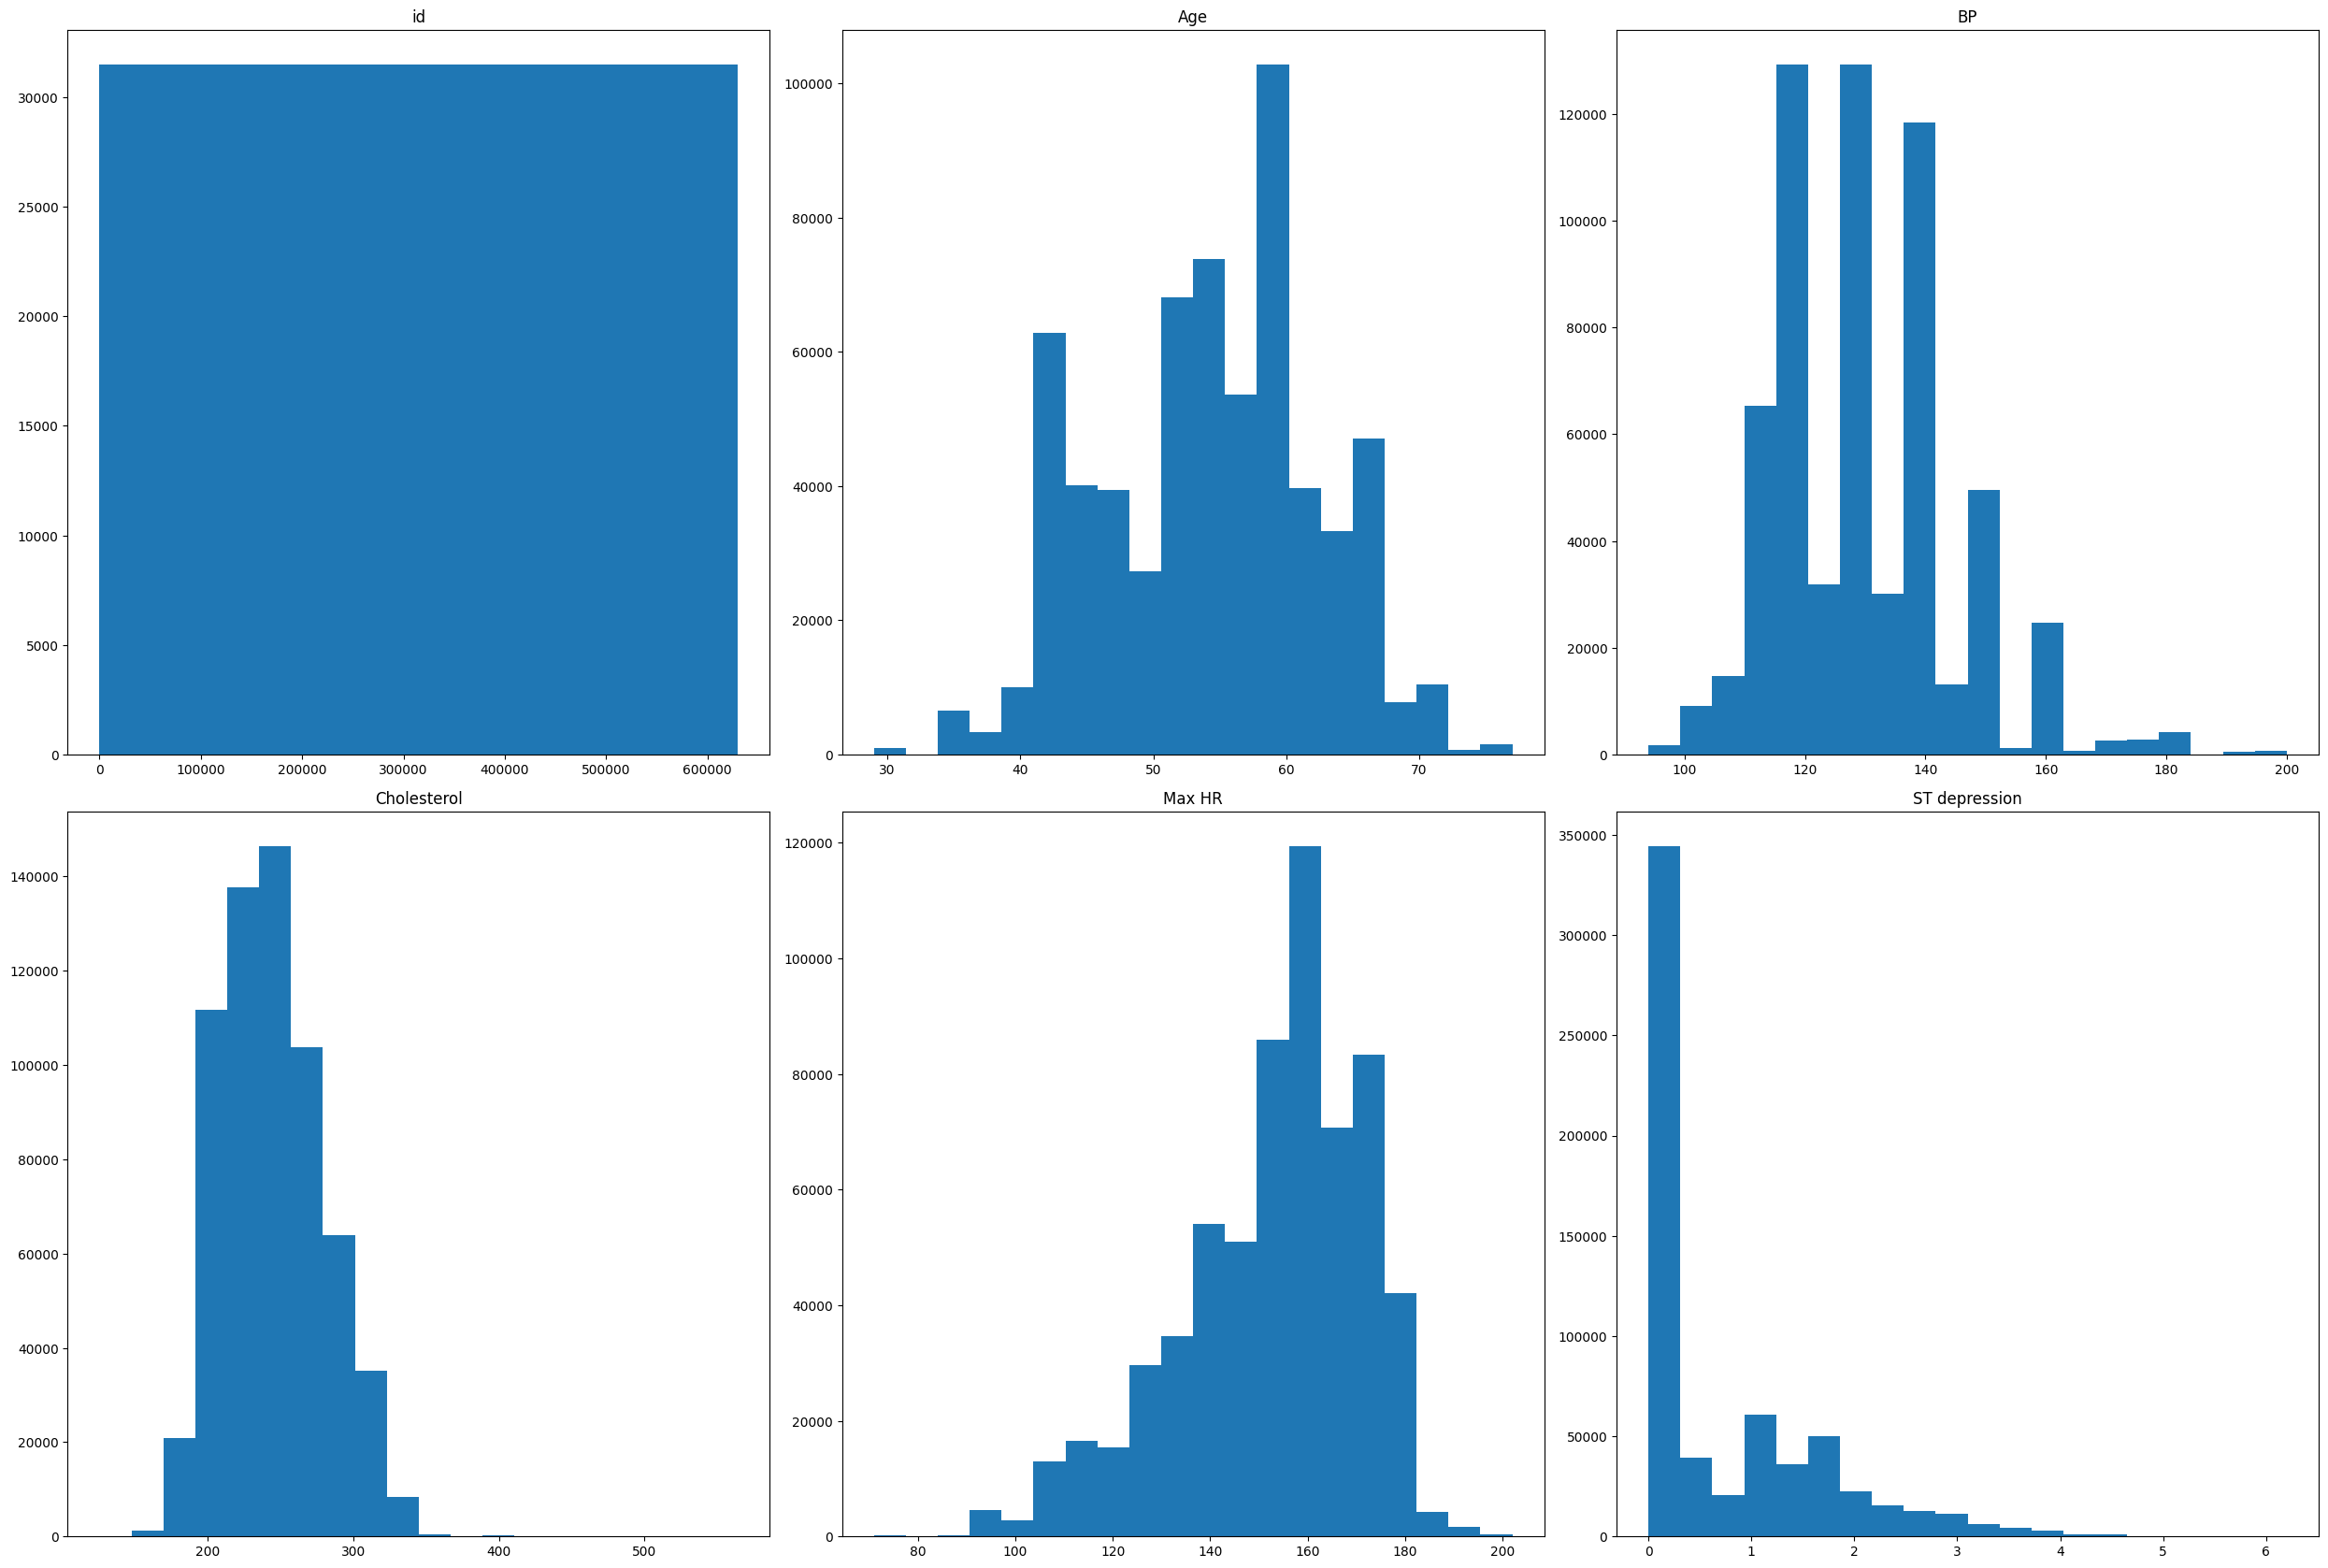

In [22]:
numerical_df.hist(bins=20, figsize=(25,25), layout=(3,3),grid=False)
plt.tight_layout()
plt.show()

In [23]:
df['Cholesterol'].describe()

count    630000.000000
mean        245.011814
std          33.681581
min         126.000000
25%         223.000000
50%         243.000000
75%         269.000000
max         564.000000
Name: Cholesterol, dtype: float64